In [27]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [28]:
model_base= Sequential()
model_base.add(Flatten(input_shape=(32,32,3)))  # 1. Flatten layer (input)

model_base.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001))) # 1. Dense layer (input)
model_base.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))   # 2. Dense layer (hidden layer)
model_base.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))   # 3. Dense layer (hidden layer)
model_base.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))   # 4. Dense layer (hidden layer)
model_base.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))    # 5. Dense layer (hidden layer)

model_base.add(Dense(100, activation='softmax', kernel_regularizer=l2(0.001)))   # 2. Dense layer (single output layer)



C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

res=model_base.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

loss, accuracy = model_base.evaluate(x_test, y_test)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.1198 - loss: 3.8564 - val_accuracy: 0.1217 - val_loss: 3.8602
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1264 - loss: 3.8256 - val_accuracy: 0.1263 - val_loss: 3.8507
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1292 - loss: 3.8091 - val_accuracy: 0.1267 - val_loss: 3.8492
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.1363 - loss: 3.7820 - val_accuracy: 0.1398 - val_loss: 3.7959
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1370 - loss: 3.7723 - val_accuracy: 0.1355 - val_loss: 3.7854
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1423 - loss: 3.7479 - val_accuracy: 0.1389 - val_loss: 3.7704
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1465 - loss: 3.7251 - val_accuracy: 0.1318 - val_loss: 3.8633
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.1472 - loss: 3.7195 - 

Test Loss: 3.6520836353302
Test Accuracy: 0.17739999294281006


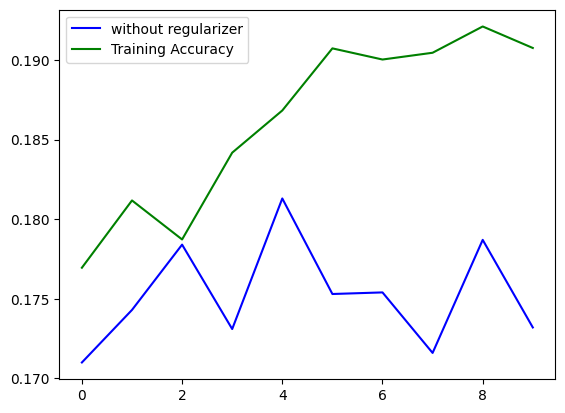

In [26]:
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(res.history['val_accuracy'], label='without regularizer', color='blue')
plt.plot(res.history['accuracy'], label='Training Accuracy', color='green')
plt.legend()
